## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [239]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

df = pd.read_csv('/Users/vitalijuskuica/Projects/AnalyzeABTestResults 2/ab_data.csv')
df.head()

b. Use the below cell to find the number of rows in the dataset.

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


#### number of rows 294478

c. The number of unique users in the dataset.

In [241]:
df['user_id'].nunique()

290584

#### number of unique users 290584

d. The proportion of users converted.

In [242]:
df[df['converted']==True].user_id.nunique()/df['user_id'].nunique() *100

12.104245244060237

#### The proportion of users converted 12.104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [243]:
df.query('group =="control" & landing_page=="new_page"').user_id.count() + df.query('group =="treatment" & landing_page=="old_page"').user_id.count()


3893

#### The number of times the new_page and treatment don't line up - 3893

f. Do any of the rows have missing values?

In [244]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

#### Do any of the rows have missing values? Answer: NO

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [245]:
df_drop = df.query('group =="treatment" & landing_page=="old_page"') + df.query('group =="control" & landing_page=="new_page"')
df2 = df.drop(df_drop.index, axis=0)

In [246]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [247]:
df2['user_id'].nunique()

290584

#### How many unique user_ids are in df2? Answer: 290584

In [248]:
# counting total user ID
df2.user_id.count()

290585

b. There is one **user_id** repeated in **df2**.  What is it?

In [249]:
df2[df2['user_id'].duplicated() == True].user_id

2893    773192
Name: user_id, dtype: int64

#### There is one user_id repeated in df2. What is it?  Answer: it's one - 773192

c. What is the row information for the repeat **user_id**? 

In [250]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


#### What is the row information for the repeat user_id? Answer: 2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [251]:
df2.drop(df.index[2893],inplace=True)

In [252]:
#checked that dataset narrowed by 1 row
df2.user_id.count()

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [253]:
df2.query('converted ==1').converted.count()/ df2.converted.count()

0.11959708724499628

#### What is the probability of an individual converting regardless of the page they receive? Answer: 0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [254]:
df2.query('converted ==1 & group=="control"').converted.count()/ df2.query('group=="control"').converted.count()

0.1203863045004612

#### Given that an individual was in the control group, what is the probability they converted? Answer: 0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [255]:
df2.query('converted ==1 & group=="treatment"').converted.count()/ df2.query('group=="treatment"').converted.count()

0.11880806551510564

#### Given that an individual was in the treatment group, what is the probability they converted? Answer: 0.11880806551510564

d. What is the probability that an individual received the new page?

In [256]:
df2.query('landing_page=="new_page"').converted.count()/ df2.landing_page.count()

0.5000619442226688

#### What is the probability that an individual received the new page? Answer: 0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

#### Just by looking at the above numbers we cannot conclude that new treatment page returns more conversion. Sample is fairly split by half on each side which indicates it's pretty fair comparison but results are too insufficient between two pages to call one significantly better than other. However, if we look purely from statistical standpoint new treatment page is worse than control page (difference in percentage 0.0015782389853555567)

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$** : **$p_{old}$** - **$p_{new}$** >=0


**$H_{1}$** : **$p_{old}$** - **$p_{new}$** < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [257]:
convert_new = df2.query('converted ==1').converted.count()/ df2.converted.count()
convert_new

0.11959708724499628

#### What is the **convert rate** for $p_{new}$ under the null? Answer: 0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? 

In [258]:
convert_old = df2.query('converted ==1').converted.count()/ df2.converted.count()
convert_old

0.11959708724499628

#### What is the **convert rate** for $p_{old}$ under the null?  Answer: 0.11959708724499628

c. What is $n_{new}$?

In [259]:
n_new = df2.query('landing_page=="new_page"').converted.count()
n_new

145310

####  What is $n_{new}$? Answer: 145310

d. What is $n_{old}$?

In [260]:
n_old = df2.query('landing_page=="old_page"').converted.count()
n_old

145274

#### What is $n_{old}$? Answer: 145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [261]:
new_page_converted = np.random.choice([0,1],n_new,p = [convert_new, 1-convert_new])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [262]:
old_page_converted = np.random.choice([0,1],n_old,p = [convert_old, 1-convert_old])
old_page_converted

array([1, 1, 0, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [263]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.0012341487493607861

#### $p_{new}$ - $p_{old}$ see number above

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [264]:
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    new_page_converted1 = np.random.choice([0,1],n_new,replace=True,p = [convert_new, 1-convert_new])
    old_page_converted1 = np.random.choice([0,1],n_old,replace=True,p = [convert_old, 1-convert_old])
    p_diffs.append(new_page_converted1.mean()-old_page_converted1.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

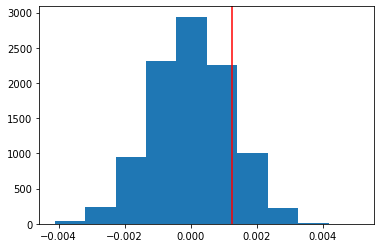

In [265]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.axvline(diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [266]:
act_diffs = df2.query('landing_page=="new_page"').converted.mean() - df2.query('landing_page=="old_page"').converted.mean()
act_diffs
(p_diffs>act_diffs).mean()

0.9118

#### What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv? Answer: see cell above (always about 0.9..)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### I computed p value (which is very high) in question J. Answer concludes that there is NO sufficient evidence, with a type I error rate of 0.05, that the new website conversion rate increases when new loading page is used. This means we fail to reject null hypothesis which suggest that new page is not better than old one in terms of conversion.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [267]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" & converted ==1').converted.count()
convert_new = df2.query('landing_page=="new_page" & converted ==1').converted.count()
n_old = df2.query('landing_page=="old_page"').converted.count()
n_new = df2.query('landing_page=="new_page"').converted.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [268]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller')
print('z-score:',z_score, 'p-value:',p_value)

z-score: 1.3109241984234394 p-value: 0.9050583127590245


In [269]:
from scipy.stats import norm
# Critical value at 95% confidence
print(norm.ppf(1-(0.05/2))) 

1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### z-score is within critical 95% confidence interval of -1.96 and 1.96. Z-score shows how many standard deviations results are from the mean (1.31). However, p value is still very high (in line with one computed in question J). This confirms previous conclusion that we fail to reject null hypothesis. It is not enough evidence that new page is better than the old one.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [270]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [271]:
df2[['non_ab_page','ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop(['non_ab_page'],axis =1)
df2['intercept'] = 1

In [272]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [273]:
mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Apr 2021   Pseudo R-squ.:               8.077e-06
Time:                        19:34:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

#### P value is 0.190 which indicates it's not statistically significant to predict convertion based on landing page. Also, treatment page coefficient is negative -0.0150 which means that treatment page is less likely to be converted than control page.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### In logistic regression our hypothesis differs from the one in part II. 
#### Part II

**$H_{0}$** : **$p_{old}$** - **$p_{new}$** >=0


**$H_{1}$** : **$p_{old}$** - **$p_{new}$** < 0

#### Logistic regression

**$H_{0}$** : **$p_{old}$** = **$p_{new}$**


**$H_{1}$** : **$p_{old}$** = **$p_{new}$**

#### This leads to different p value. However, in regression analysis we can also see that p value of 0.19 is sigficantly above type I error of 0.05. This means we fail to reject null hypothesis and have no suffiecient evidence to confirm that new page is different that old page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### It's clearly worth considering other factors that have potential impact conversion because looking at just treatment and control page we can potentially miss other reasons leading to conversion. When adding additional terms to regression analysis is important to check for multicollinearity to make sure we make clear conclusion. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [274]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [275]:
df_new[['UK','US','CA']] = pd.get_dummies(df_new[['country']])
df_new = df_new.drop(['CA'],axis =1)

In [276]:
mod_new = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])
results_new= mod_new.fit()
results_new.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Apr 2021   Pseudo R-squ.:               2.323e-05
Time:                        19:34:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

#### Country doesn't seem to have impact to our research. P value is still significantly above Type I 0.05 error rate. Both regions added have high p value which indicates that we fail to reject null hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [277]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [278]:
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']

In [279]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


In [280]:
mod_new2 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US','UK_ab_page','US_ab_page']])
results_new2= mod_new2.fit()
results_new2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 26 Apr 2021   Pseudo R-squ.:               3.482e-05
Time:                        19:34:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0175      0.038     -0.465      0.642      -0.091       0.056
US            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
US_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

#### Merged country and ab_page didn't improve our model. Model p value is 0.1920 and newly added measures also have high p values which indicates they don't provide sufficient evidence of whether region and landing page combo discribes converstion. We again fail to reject null hypothesis and conclude that there is no evidence of old page being any different from new page.

<a id='conclusions'></a>
## Conclusions

#### To sum up, A/B testing and regression analysis didn't fail to reject null hypothesis which state that old landing page is equally good or better than the new landing page (under A/B testing) or old landing page is equally good as new landing page (regression analysis). It should be advised that new landing page doesn't return higher conversion rate based on the data given. Also, regression analysis that included region didn't show any more explanatory information about conversation. Based on the information given company should stick with old landing page.